### LOGISTIC REGRESSION WITH GRADIENT DESCENT (Social_Network_Ads.csv)

#### importing libraries

In [7]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import math

#### getting data set

In [13]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
n = len(df)
cols = list(df.columns[:-1])

X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


#### feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### reshaping X and y, and making matrices using closed form 

In [12]:
rows = X.shape[0]
columns = X.shape[1]
#y has a shape of (400,) i.e 400 rows. to make it explicity a Id np array, we'll reshape it with cols=1
y = y.reshape(y.shape[0], 1)
print("no. of samples/rows: {}\nno. of input features: {}, namely: {}".format(rows, columns, cols))
print("X.shape: {}".format(X.shape))
print("y.shape: {}\n".format(y.shape))

ones = np.ones((rows, 1), dtype=int)


#adding this ones column to X
X = np.concatenate((ones, X), axis=1)
#for updated X, first col of 1s represents x0 i.e 1(coef of intercept), 
#second and third col represent coefs of Age(x1) and EstimatedSalary(x2) respectively
#no. columns gets updated by 1
columns = X.shape[1]
print(X)


no. of samples/rows: 400
no. of input features: 4, namely: ['Age', 'EstimatedSalary']
X.shape: (400, 4)
y.shape: (400, 1)

[[ 1.          1.          1.         -1.78179743 -1.49004624]
 [ 1.          1.          1.         -0.25358736 -1.46068138]
 [ 1.          1.          1.         -1.11320552 -0.78528968]
 ...
 [ 1.          1.          1.          1.17910958 -1.46068138]
 [ 1.          1.          1.         -0.15807423 -1.07893824]
 [ 1.          1.          1.          1.08359645 -0.99084367]]


#### defining learning rate and epochs(#iterations)

In [5]:
a = 0.1
epochs = 20

#### checking for missing values

In [6]:
if pd.isnull(df).values.any() == True:
    print('missing values exist')
else:
    print('no missing values')

no missing values


#### splitting into training and testing set (70/30)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print(X_train.shape)
print(y_train.shape)

(280, 3)
(280, 1)


#### function for calculating the hypothesis function for logistic regression

In [8]:
def getHypothesisF(z):
    return (1/(1+np.exp(-z)))

#### function for calculating cost

In [9]:
def getCost(y, y_pred):
    cost = y*np.log(y_pred) + (1-y)*np.log(1-y_pred)
    J = (-1/y.shape[0])*sum(cost)
    return J.round(6)

#### function for performing logistic regression with gradient descent

In [10]:
def logisticRegressionWithGD(X_train, y_train, epochs, a, columns, rows):
    theta = np.zeros((columns, 1))
    accuracy_train = np.empty([epochs])
    cost_train = np.empty([epochs])
    
    for i in range(epochs):
        print("\nITERATION {}\n\n".format(i))
        #getting the hypothesis
        print("\tcurrent theta: {}\n\n".format(theta.T))
        y_pred = getHypothesisF(X_train.dot(theta))
        
        #classfying the labels
        y_label = np.where(y_pred >= 0.5, 1, 0)
        
        #calculating the cost associated with current prediction
        cost_train[i] = getCost(y_train, y_pred)
        print("\tcost: {}\n".format(cost_train[i]))
        
        #getting the accuracy for current prediction
        difference = y_pred - y_train
        accuracy_train[i] = 1 - (sum(difference)/rows)
        
        #improving on coefs for next iteration
        theta = theta - a*((((difference.T).dot(X_train))/rows).T)
        
    return (y_label, accuracy_train, cost_train)
        

In [11]:
y_label, accuracy_train, cost_train = logisticRegressionWithGD(X_train, y_train, epochs, a, X_train.shape[1], X_train.shape[0])



ITERATION 0


	current theta: [[0. 0. 0.]]


	cost: 0.693147


ITERATION 1


	current theta: [[-0.01214286  0.02977178  0.01849719]]


	cost: 0.679582


ITERATION 2


	current theta: [[-0.02398196  0.05873969  0.03638919]]


	cost: 0.66677


ITERATION 3


	current theta: [[-0.03552541  0.08692735  0.05369629]]


	cost: 0.654669


ITERATION 4


	current theta: [[-0.04678156  0.11435894  0.0704391 ]]


	cost: 0.643236


ITERATION 5


	current theta: [[-0.05775892  0.14105896  0.08663836]]


	cost: 0.632429


ITERATION 6


	current theta: [[-0.06846606  0.16705202  0.10231478]]


	cost: 0.622211


ITERATION 7


	current theta: [[-0.07891159  0.19236258  0.11748886]]


	cost: 0.612545


ITERATION 8


	current theta: [[-0.08910403  0.21701488  0.13218077]]


	cost: 0.603395


ITERATION 9


	current theta: [[-0.09905184  0.24103274  0.14641027]]


	cost: 0.594729


ITERATION 10


	current theta: [[-0.10876329  0.26443949  0.16019657]]


	cost: 0.586516


ITERATION 11


	current theta: [[-0.

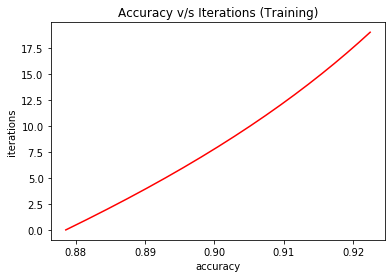

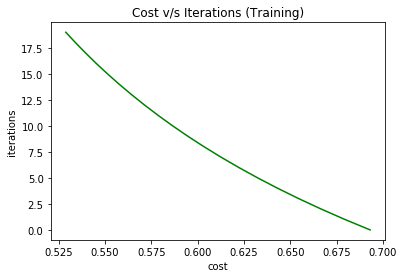

In [12]:

plt.plot(accuracy_train, range(epochs), color='red')
plt.xlabel("accuracy")
plt.ylabel("iterations")
plt.title("Accuracy v/s Iterations (Training)")
plt.show()

plt.plot(cost_train, range(epochs), color='green')
plt.xlabel("cost")
plt.ylabel("iterations")
plt.title("Cost v/s Iterations (Training)")
plt.show()